# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

---



Выполнил студент гр. 3385 Гребенщиков Артём Андреевич. Вариант №3.

## Цель работы

Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.


## Основные теоретические положения


### Основные определения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{g(g-1)}$$

где $L$ - количество рёбер, $g$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$

#### Двудольные сети

Сеть $G = (V, E)$, где $V = V_1 \cup V_2$, $V_1 \cap V_2 = \emptyset$, и все рёбра $e \in E$ соединяют вершины из разных множеств:
$$
E \subseteq \{(u,v) | u \in V_1, v \in V_2\}
$$


#### Гиперграф

Обобщение графа, в котором каждым ребером могут соединяться не два узла, а подмножество

$$
H = H(A, B)$$ где

$A$ - набор вершин

$B$ - набор гипер ребер


#### Проекции двудольной сети

- *Проекция на акторы* ($P_1$): $A_1 = B B^T - D_1$
- *Проекция на события* ($P_2$): $A_2 = B^T B - D_2$

где $D_1$, $D_2$ - диагональные матрицы степеней.


#### K-ядра

$k$-ядро - максимальный подграф, в котором каждый узел смежен не менее чем с k узлами в подграфе:

$$\deg(v) \geq k, ∀ v \in V$$


#### Отношение шансов

Для таблицы сопряженности:

| | Участвует в $j$ | Не участвует в $j$ |
|-|-----------------|-------------------|
| Участвует в $i$ | $a$ | $b$ |
| Не участвует в $i$ | $c$ | $d$ |

$$
OR = \frac{a \cdot d}{b \cdot c}, \quad LOR = \ln(OR)
$$





### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$

### Групповые характеристики сетей

#### Централизация по степени
$$
C_D = \frac{\sum_{i=1}^g [C_D(n^*) - C_D(n_i)]}{(g-1)(g-2)}
$$
где $C_D(n^*)$ - максимальная степень центральности, $g$ - число вершин.

#### Централизация по близости
$$
C_C = \frac{\sum_{i=1}^g [C'_C(n^*) - C'_C(n_i)]}{[(g-2)(g-1)]/(2g-3)}
$$

#### Централизация по посредничеству
$$
C_B = \frac{\sum_{i=1}^g [C'_B(n^*) - C'_B(n_i)]}{g-1}
$$


### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_i(i)}{g-1}$$

где $deg_i(i)$ - полустепень захода.

#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$


### Алгоритмы визуализации сетей

#### Фрюхтерман-Рейнгольд
Основан на физической аналогии:
- Вершины отталкиваются друг от друга
- Рёбра действуют как пружины
Минимизирует функцию энергии:

$$E = \sum_{i \neq j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij})$$

где $k_r$ - сила отталкивания, $k_a$ - сила притяжения.

#### Камада-Каваи
Минимизирует разницу между геодезическими и евклидовыми расстояниями:

$$E = \sum_{i \neq j} \frac{1}{2} k_{ij}(||p_i - p_j|| - l_{ij})^2$$

где $l_{ij}$ - желаемое расстояние, $k_{ij}$ - вес пружины.

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы


### Загрузка необходимых библиотек

In [151]:
# Подключаем библиотеку для работы с графами
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

# Подключаем библиотеку для работы с гиперграфами
if (!require(HyperG)) {
  install.packages("HyperG")
  library(HyperG)
}

### Работа с florentine_business.csv

#### 1. Извлечение из florentine_business.csv социоматрицы



              Acciaiuoli  Albizzi  Barbadori  Bischeri  Castellani  Ginori
Acciaiuoli             0        0          0         0           0       0
 Albizzi               0        0          0         0           0       0
 Barbadori             0        0          0         0           1       1
 Bischeri              0        0          0         0           0       0
 Castellani            0        0          1         0           0       0
 Ginori                0        0          1         0           0       0
 Guadagni              0        0          0         1           0       0
 Lamberteschi          0        0          0         1           1       0
 Medici                0        0          1         0           0       1
 Pazzi                 0        0          0         0           0       0
 Peruzzi               0        0          1         1           1       0
 Pucci                 0        0          0         0           0       0
 Ridolfi               0 

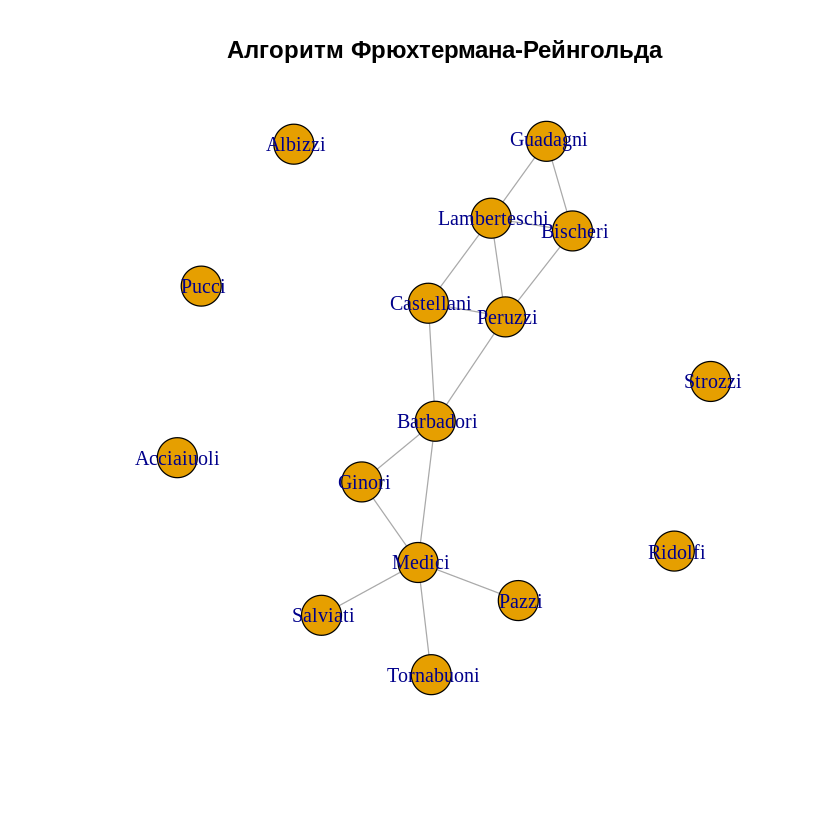

In [152]:
# Переменная хранит адрес файла florentine_business.csv
url <- "https://drive.google.com/file/d/1shboWsyEAABA1P2EM4CtN5Y6FeRiwZi3/view?usp=sharing"

url <- paste0("https://drive.google.com/uc?id=",
              gsub(".*/d/([^/]+).*", "\\1", url))

data <- read.csv(url,
                 header = FALSE,
                 skip = 1,           # пропускаем комментарий "Business relation between Florentine families"
                 sep = ",",
                 stringsAsFactors = FALSE)

# Создание временной матрицы, чтобы узнать размерность
temp_matrix <- data[-1, ]

# Создание социоматрицы
sociomatrix <- matrix(as.numeric(unlist(temp_matrix)),
                     nrow = nrow(temp_matrix),
                     ncol = ncol(temp_matrix))

# Извлекаем названия семей из первой строки данных
family_names <- as.character(data[1, ])

# Устанавливаем названия
rownames(sociomatrix) <- family_names
colnames(sociomatrix) <- family_names
print(sociomatrix)

# Построение графа по социоматрице с задачей параметра mode в 'undirected', что делает граф ненаправленным
inet1 <- graph_from_adjacency_matrix(sociomatrix, mode = 'undirected')

# Алгоритм Фрюхтермана-Рейнгольда
plot(inet1, main = "Алгоритм Фрюхтермана-Рейнгольда", layout = layout_with_fr)

#### 2. Поиск точек сочленения и мостов


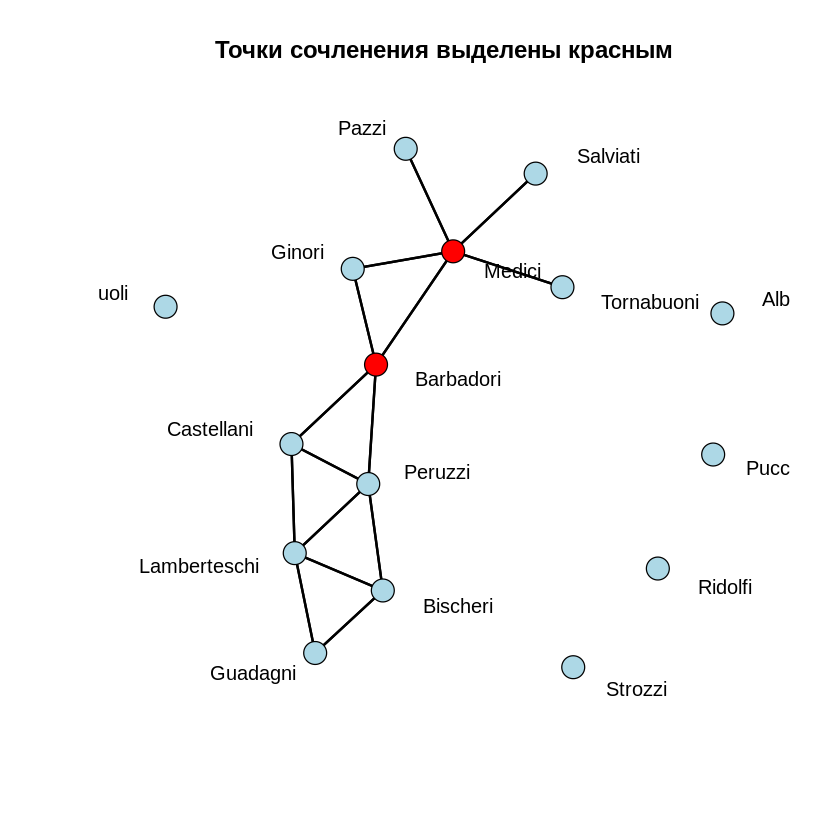

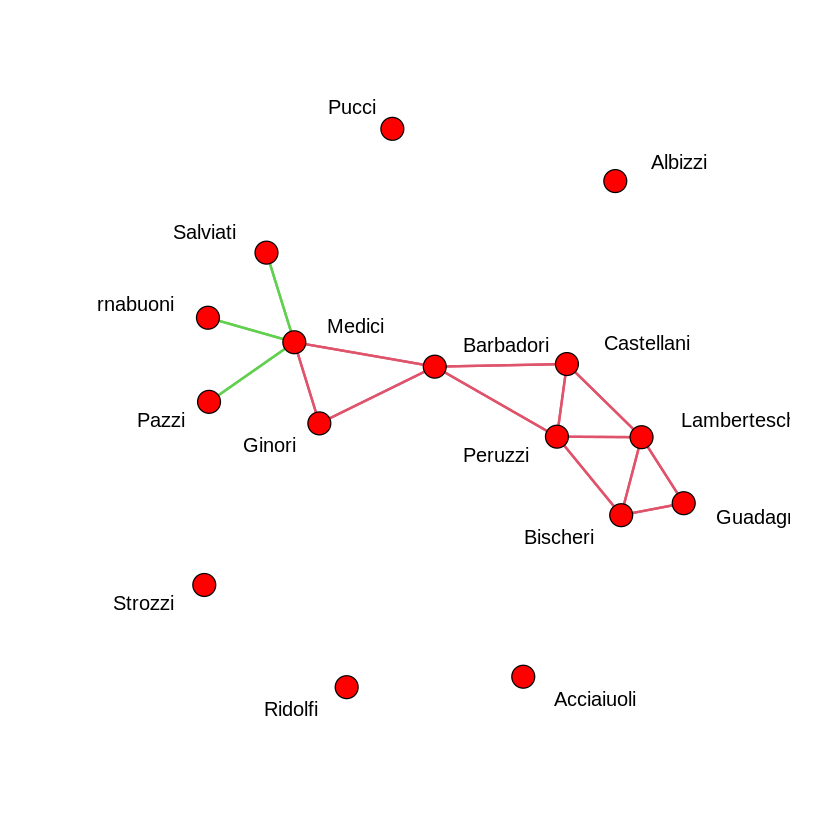

In [153]:
net1 <- network(sociomatrix, matrix.type = "adjacency")

# Поиск точек сочленения

is_cut <- cutpoints(net1, mode = "graph", return.indicator = TRUE)

gplot(net1, gmode = "graph", vertex.col = ifelse(is_cut, "red", "lightblue"),
  displaylabels = TRUE, main = "Точки сочленения выделены красным")

# Поиск мостов

bridges <- function(dat,mode="graph",
                    connected=c("strong", "weak")) {
  e_cnt <- network.edgecount(dat)
  if (mode == "graph") {
    cmp_cnt <- components(dat)
    b_vec <- rep(FALSE,e_cnt)
    for(i in 1:e_cnt){
      dat2 <- dat
      delete.edges(dat2,i)
      b_vec[i] <- (components(dat2) != cmp_cnt)
    }
  }
  else {
    cmp_cnt <- components(dat,connected=connected)
    b_vec <- rep(FALSE,e_cnt)
    for(i in 1:e_cnt){
      dat2 <- dat
      delete.edges(dat2,i)
      b_vec[i] <- (components(dat2,connected=connected)
                   != cmp_cnt)
    }
  }
  return(b_vec)
}

brnet <- bridges(net1)
gplot(net1,gmode="graph",vertex.col="red",
      edge.col=brnet+2, coord=mycoord,
      jitter=FALSE,displaylabels=TRUE)

#### 3.  Значение централизации для каждой меры

In [154]:
snet1 <- asNetwork(inet1)

# Создаем подграф без изолированных вершин
non_isolated_vertices <- which(degree(snet1) > 0)
snet1_connected <- get.inducedSubgraph(snet1, non_isolated_vertices)

# Вычисляем меры
g <- network.size(snet1_connected)
deg <- degree(snet1_connected)
closeness_cent <- closeness(snet1_connected, gmode = "graph")
between_cent <- betweenness(snet1_connected, gmode = "graph")

cat("Централизации для каждой меры:\n\n")

cat("Централизация по степени:\n")
C_D <- sum(max(deg) - deg) / ((g - 1) * (g - 2))
cat("C_D =", round(C_D, 4), "\n")

cat("Централизация по близости:\n")
C_С <- sum(max(closeness_cent) - closeness_cent) * (2*g - 3) / ((g - 1) * (g - 2))
cat("C_С =", round(C_B, 4), "\n")

cat("Централизация по посреднечиству:\n")
C_B <- sum(max(between_cent) - between_cent) * 2 / ((g - 1) * (g - 1) * (g - 2))
cat("C_B =", round(C_B, 4), "\n")


Централизации для каждой меры:

Централизация по степени:
C_D = 0.5556 
Централизация по близости:
C_С = 0.4422 
Централизация по посреднечиству:
C_B = 0.4422 


##### Вывод
По значению централизации по степени можно сделать вывод, что один или несколько узлов имеют больше связей. Низкая централизация по близости говорит о том, что многие узлы находятся примерно на одинаковом расстоянии от остальных. По централизации по посреднечиству можно сделать вывод, что есть узлы, которые больше контролируют поток информации, т.к. через них проходят кротчайщие пути.


#### 4. Исследование сети на предмет подгрупп

coreness
0 1 2 
5 3 8 

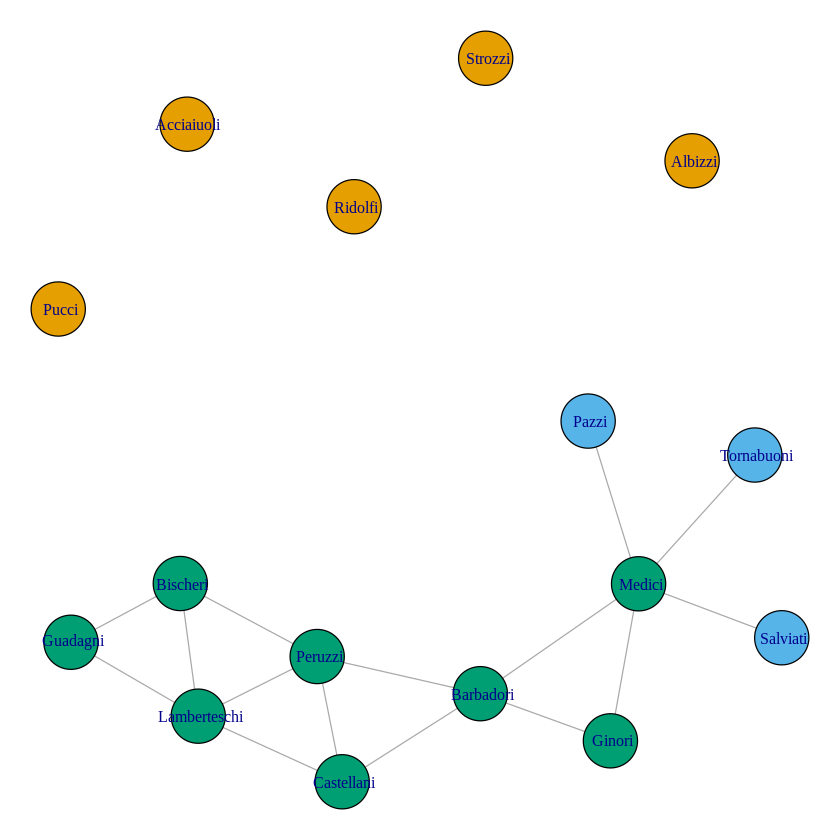

In [155]:
# Вычисляем k-core
core_values <- coreness(inet1)
max_k <- max(coreness)

# Выводим сводку k-ядер и вершин
table(coreness)

inet1 <- set_vertex_attr(inet1, name = "color", value = coreness + 1)

# Визуализрование графа с раскраской вершин для каждого k
op <- par(mar = rep(0, 4))
plot(inet1,vertex.label.cex=0.8)
par(op)

##### Вывод
По таблице и графу видно, что в сети выделяется 2-ядро, состоящее из 8 узлов, каждый из которых связан как минимум с двумя другими узлами внутри этого ядра. Это указывает на наличие сплочённой и устойчивой подгруппы, способной сохранять внутренние связи даже при удалении менее связанных акторов. Кроме того, в сети присутствуют 3 узла с 𝑘 = 1, имеющих лишь по одной связи, и 5 изолированных узлов (𝑘 = 0), не участвующих в коммуникационной структуре. Таким образом, сеть имеет чётко выраженную организацию: активное ядро сосредоточено в группе из 8 узлов, в то время как остальные акторы либо слабо социальны, либо полностью изолированы.

#### 5. Исследование алгоритма обнаружения сообществ

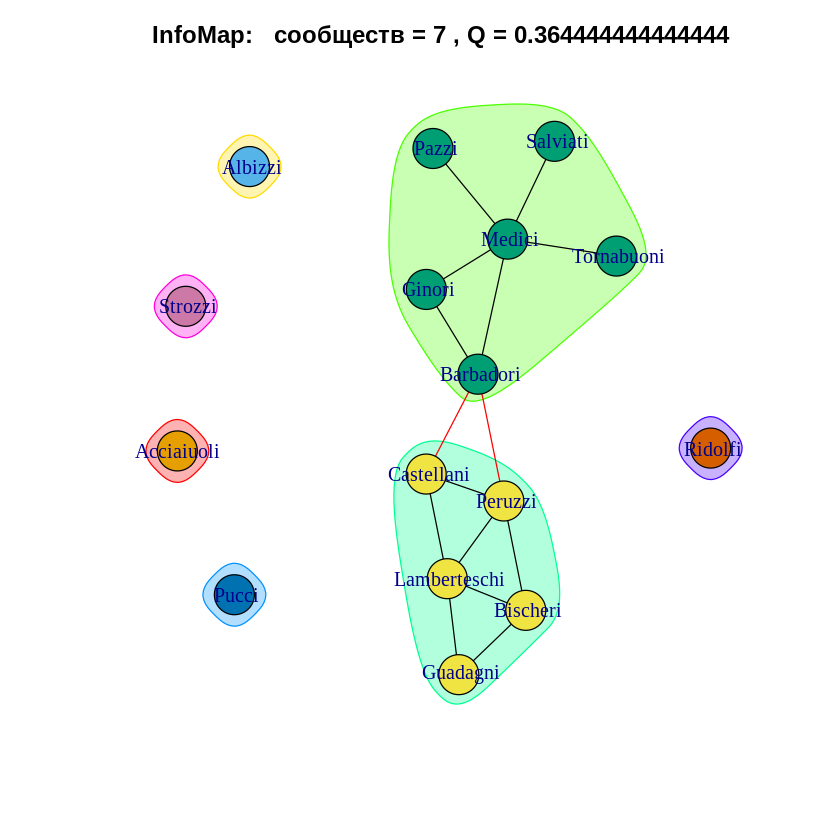

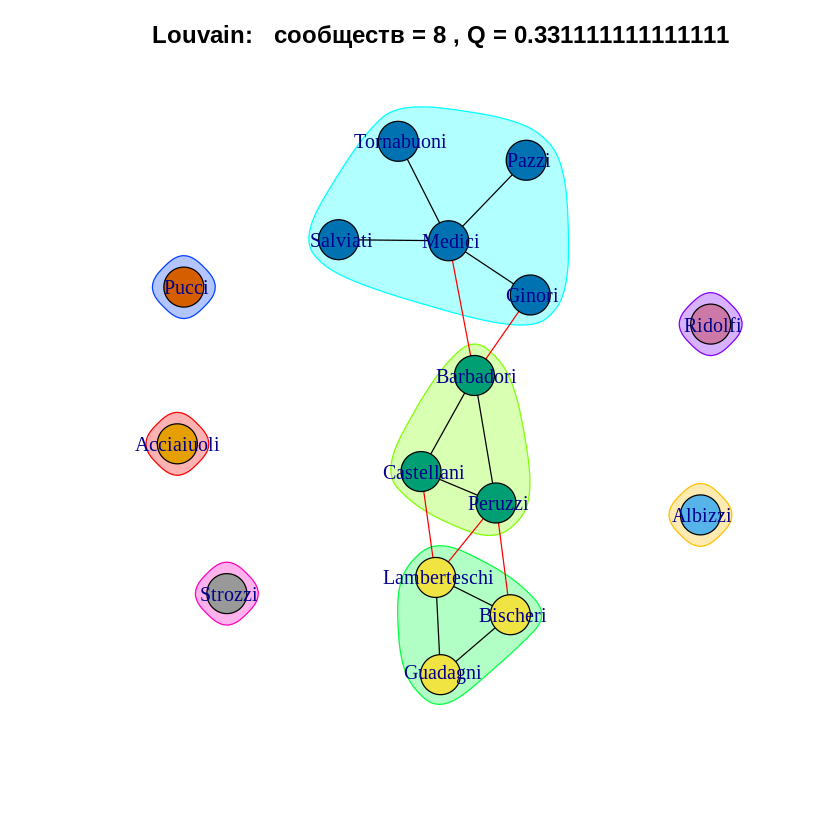

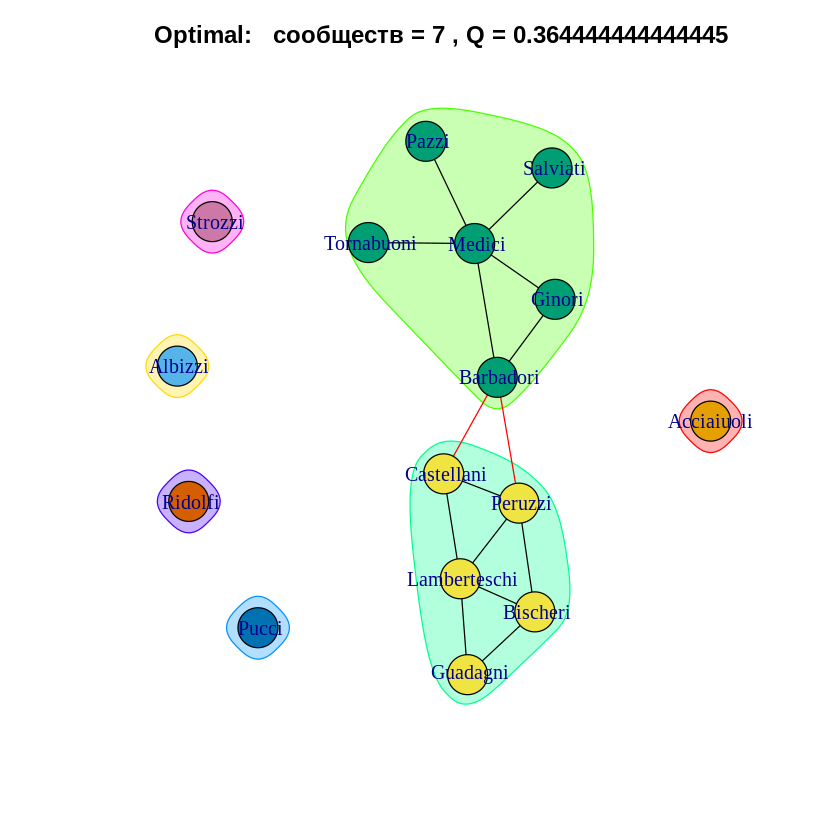

In [156]:
# Вычисление модулярностей
infomap_comm <- cluster_infomap(inet1)
louvain_comm <- cluster_louvain(inet1)
optimal_comm <- cluster_optimal(inet1)

# Вывод количества сообществ и модулярности
ic_str <- paste("InfoMap:   сообществ =", length(infomap_comm), ", Q =", modularity(infomap_comm), "\n")
lc_str <- paste("Louvain:   сообществ =", length(louvain_comm), ", Q =", modularity(louvain_comm), "\n")
oc_str <- paste("Optimal:   сообществ =", length(optimal_comm), ", Q =", modularity(optimal_comm), "\n")
plot(infomap_comm, inet1, main = ic_str)
plot(louvain_comm, inet1, main = lc_str)
plot(optimal_comm, inet1, main = oc_str)



##### Вывод
Алгоритмы обнаружения сообществ — InfoMap, Louvain и точный метод оптимизации модулярности — реализуют разные принципы выявления структуры в сетях. InfoMap не совсем оптимизирует модулярность — он преследует другую цель, связанную с эффективным сжатием информации о структуре графа, и особенно хорошо работает с ориентированными и разрежёнными сетями.
В противоположность этому, метод Louvain напрямую максимизирует модулярность, используя жадную многоуровневую стратегию. На первом этапе он последовательно перемещает вершины между соседними сообществами, если это приводит к росту модулярности; на втором — сжимает каждое найденное сообщество в одну макровершину и повторяет процесс. Такой иерархический подход делает Louvain чрезвычайно быстрым и масштабируемым, хотя и даёт лишь приближённое решение, чувствительное к разрешающему пределу и начальным условиям.
Точный (Optimal) метод, в свою очередь, тоже оптимизирует модулярность, но делает это исчерпывающе: он находит разбиение, доставляющее глобальный максимум модулярности. Однако из-за экспоненциального роста числа возможных разбиений с увеличением размера графа, этот метод практически применим лишь к сетям небольшого размера — обычно до нескольких сотен вершин.

В данном случае все три метода выделили одинаковое число сообществ — 7, и достигли одинаковой модулярности Q ~ 0.364. Это указывает на то, что структура графа, вероятно, достаточно чёткая и устойчивая: разные алгоритмы, основанные на различных принципах, приходят к одному и тому же разбиению. Значение модулярности 0.364 явялется умеренно высоким, что свидетельствует о наличии выраженной сообщественной структуры. Следовательно, полученное разбиение можно считать надёжным и репрезентативным для анализируемой сети.

### Работа с сетью аффелированости ceo.csv

#### 6. Извлечение из ceo.csv социоматрицы

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    1    1    0    0    0    0    1     0     0     0     0
 [2,]    0    0    1    0    1    0    1    0    0     0     0     0     0
 [3,]    0    0    1    0    0    0    0    0    0     0     0     1     0
 [4,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     0     0     1
 [6,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    1    1    0    0    0    0    0     1     1     0     0
 [8,]    0    0    0    1    0    0    1    0    0     1     0     0     0
 [9,]    1    0    0    1    0    0    0    1    0     1     0     0     0
[10,]    0    0    1    0    0    0    0    0    1     0     0     0     0
[11,]    0    1    1    0    0    0    0    0    1     0     0     0     0
[12,]    0    0    0    1    0    0    1    0    0     0     0     0     0
[13,]    0    0    1    1

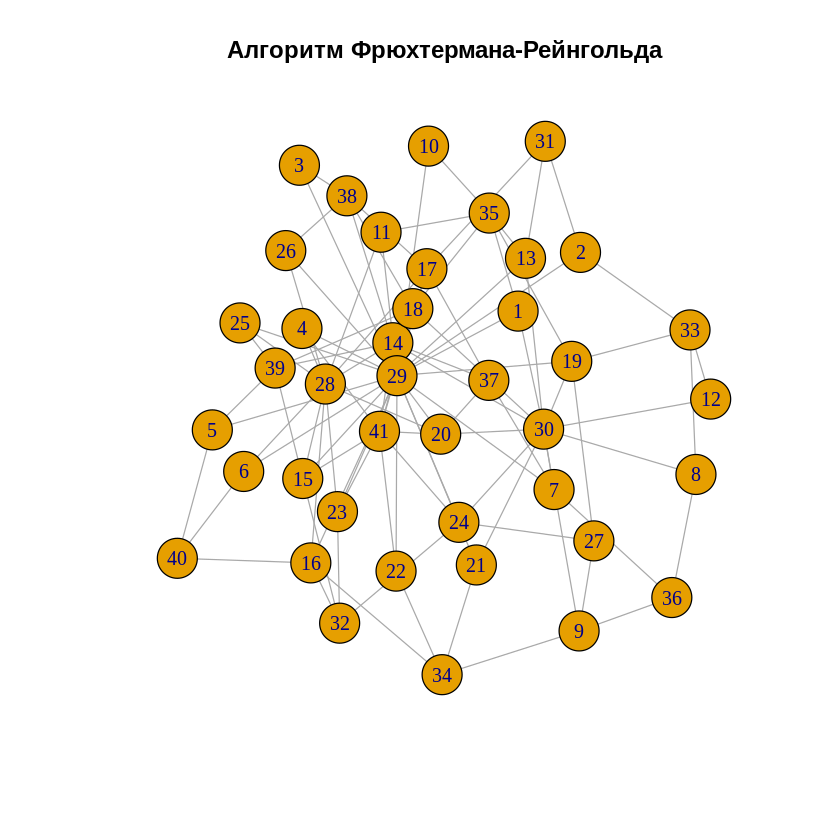

In [157]:
# Переменная хранит адрес файла ceo.csv
url <- "https://drive.google.com/file/d/17YTBt-r4hE1eoXkVWGY-DIiY1jU1f7uQ/view?usp=drive_link"

url <- paste0("https://drive.google.com/uc?id=",
              gsub(".*/d/([^/]+).*", "\\1", url))

data <- read.csv(url,
                 header = FALSE,
                 skip = 9,           # пропускаем комментарии
                 sep = ",",)

# Создание социоматрицы
sociomatrix2 <- matrix(as.numeric(unlist(data)),
                     nrow = nrow(data),
                     ncol = ncol(data))

print(sociomatrix2)

# Построение биграфа по социоматрице
inet2 <- graph_from_biadjacency_matrix(sociomatrix2)

# Алгоритм Фрюхтермана-Рейнгольда
plot(inet2, main = "Алгоритм Фрюхтермана-Рейнгольда", layout = layout_with_fr)

#### 7. Отображение сети в виде биграфа

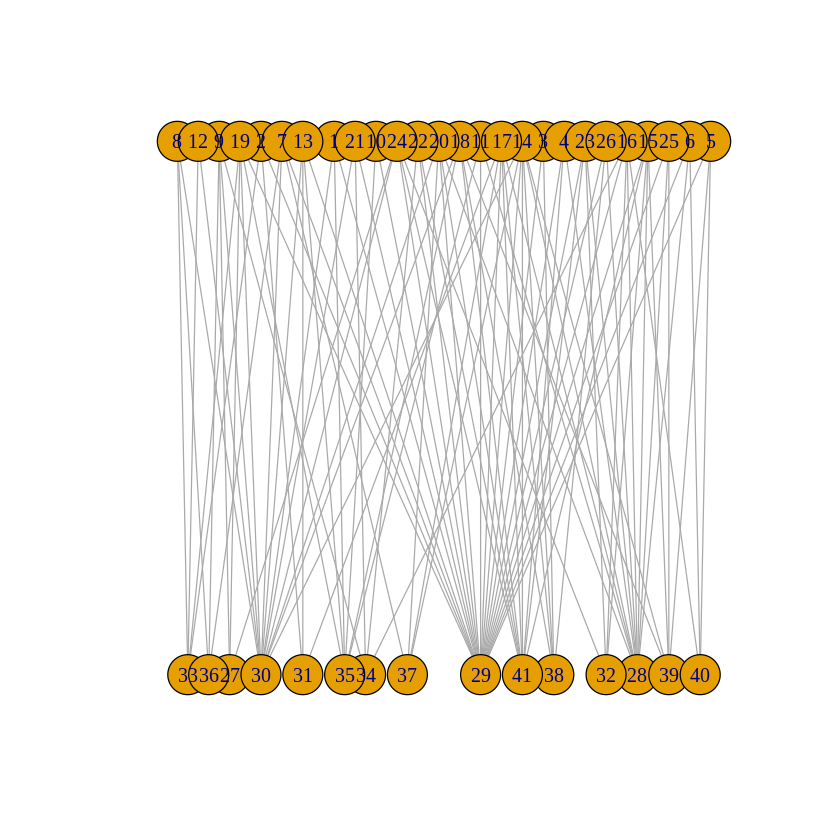

In [158]:
plot(inet2, layout=layout.bipartite)

#### 8. Отображение сети в виде гиперграфа



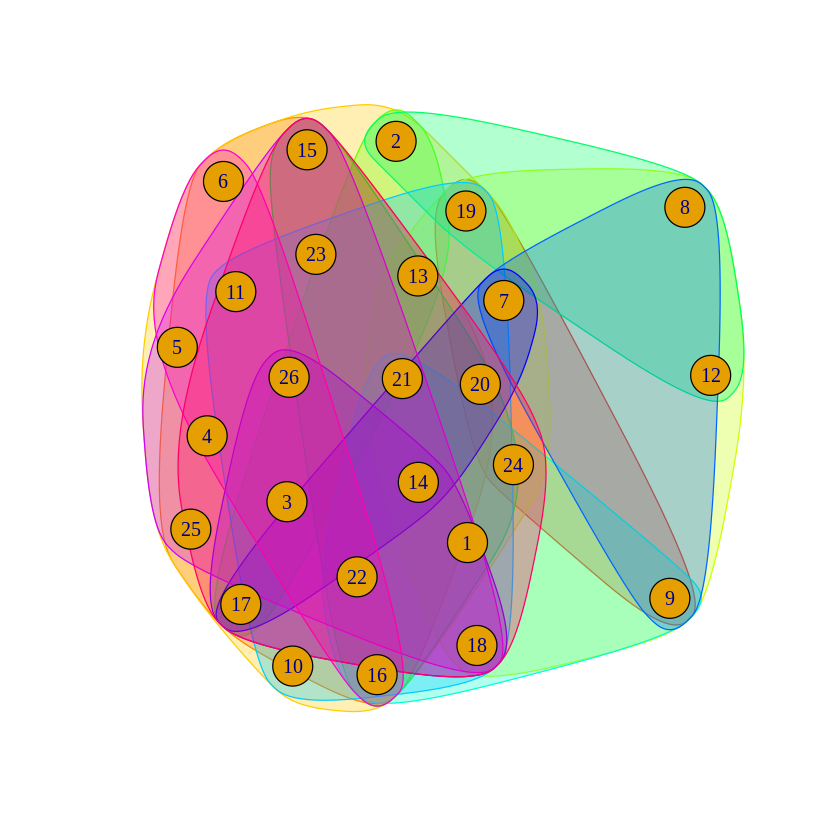

In [159]:
types <- V(inet2)$type

# Индексы CEO и клубов
ceo_ids  <- which(!types)
club_ids <- which(types)

# Список смежности по индексам
adj_list <- as_adj_list(inet2)

# Формируем гиперрёбра: для каждого клуба — список CEO
hyperedges <- list()
for (i in seq_along(club_ids)) {
  club <- club_ids[i]
  neighbors <- adj_list[[club]]  # вектор индексов соседей

  # Оставляем только тех соседей, кто — CEO
  ceo_neighbors <- neighbors[neighbors %in% ceo_ids]

  if (length(ceo_neighbors) > 0) {
    # Используем индекс клуба как имя гиперребра
    hyperedges[[as.character(club)]] <- as.character(ceo_neighbors)
  }
}
hnet2 <- as.hypergraph(hyperedges)

plot(hnet2)

#### 9. Представление сети аффилированности в виде двух одномодальных сетей



      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    1    1    1    1    1    2    1    1     2     2     1     3
 [2,]    1    0    1    1    1    1    1    1    0     1     1     1     2
 [3,]    1    1    0    1    1    1    1    0    0     1     1     0     1
 [4,]    1    1    1    0    1    2    1    0    0     1     2     0     1
 [5,]    1    1    1    1    0    2    1    0    0     1     1     0     1
 [6,]    1    1    1    2    2    0    1    0    0     1     2     0     1
 [7,]    2    1    1    1    1    1    0    2    2     1     1     1     2
 [8,]    1    1    0    0    0    0    2    0    2     0     0     2     1
 [9,]    1    0    0    0    0    0    2    2    0     0     0     1     1
[10,]    2    1    1    1    1    1    1    0    0     0     2     0     2
[11,]    2    1    1    2    1    2    1    0    0     2     0     0     2
[12,]    1    1    0    0    0    0    1    2    1     0     0     0     1
[13,]    3    2    1    1

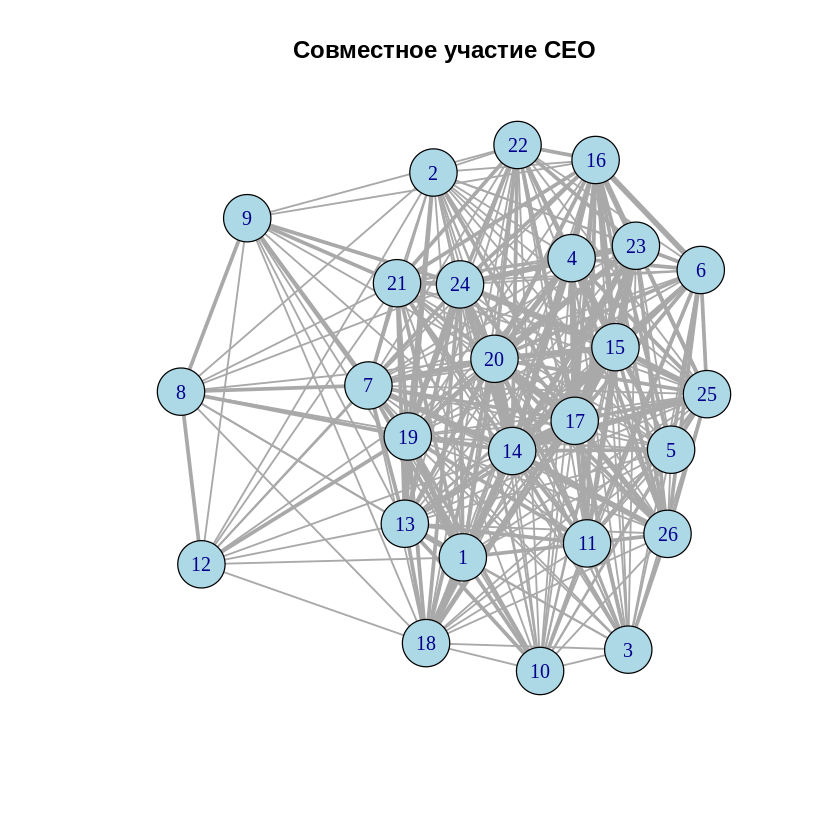

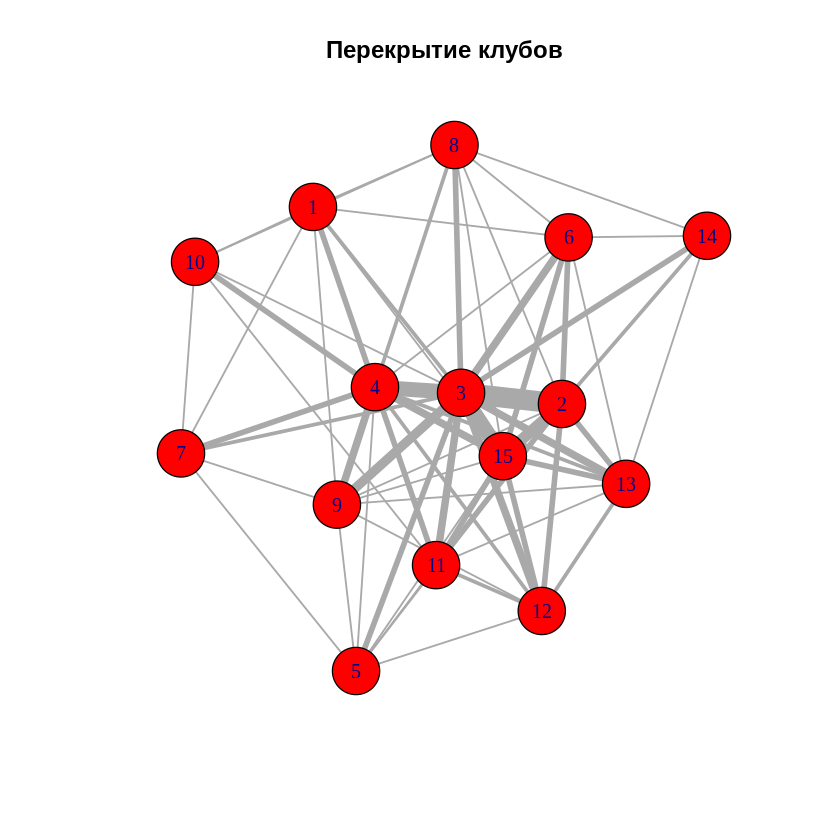

In [160]:
# Проекции: proj1 — сеть CEO, proj2 — сеть клубов
pr <- bipartite_projection(inet2, multiplicity = TRUE)

ceo_net   <- pr$proj1   # сеть совместного участия CEO
club_net  <- pr$proj2   # сеть перекрытия клубов

# Матрица совместного участия CEO
A_ceo <- as_adjacency_matrix(ceo_net, sparse = FALSE, attr = "weight")

# Матрица перекрытия клубов
A_club <- as_adjacency_matrix(club_net, sparse = FALSE, attr = "weight")

print(A_ceo)
print(A_club)

# Сеть CEO
plot(ceo_net,
     vertex.color = "lightblue",
     vertex.size = 18,
     edge.width = E(ceo_net)$weight * 1.5,  # толщина пропорциональна весу
     main = "Совместное участие CEO"
)

# Сеть клубов
plot(club_net,
     vertex.color = "red",
     vertex.size = 18,
     edge.width = E(club_net)$weight * 1.5,
     main = "Перекрытие клубов"
)


##### Вывод
В сети совместного участия CEO и в сети перекрытия клубов наблюдается неравномерная структура связей: наряду с разреженными участками выделяется достаточно плотный подграф, что подтверждается как высокими значениями весов в матрицах, так и визуально — по концентрации и толщине рёбер. Это указывает на наличие ядра тесно связанных акторов, где одни и те же CEO активно участвуют в одних и тех же клубах. Такая структура характерна для элитных коалиций, где ограниченный круг лиц концентрирует влияние через пересекающиеся членства в ключевых организациях. Напротив, более слабые или изолированные связи свидетельствуют о наличии слабо-социальных участников, включённых в сеть лишь эпизодически. Таким образом, аффилиационная сеть обладает ярко выраженной ядерной структурой, что типично для корпоративных элит.

#### 10. Вычисление степени участия и среднее количество событий для каждого актора

In [161]:
# Вычисление степени участия и среднего значения
participation <- rowSums(sociomatrix2)
mean_participation <- mean(participation)

# Вывод результатов
cat("Степени участия акторов:")
participation
cat("Среднее количество событий на актор")
round(mean_participation, 4)

Степени участия акторов:

[1] 3 3 2 3 3 3 4 3 4 2 3 2 4 7 5 5 6 5 5 5 3 3 4 5 3 3

Среднее количество событий на актор

[1] 3.7692

##### Вывод
Все акторы учавствуют в 2 событиях и почти все в 3 или более. Также особо выделяются акторы, учавствующие в 6 и 7 событиях, что значительно выше среднего значения.




#### 11. Вычисление размера и среднего размера для каждого события.

In [162]:
# Вычисление размера и среднего размера
participation <- colSums(sociomatrix2)
mean_participation <- mean(participation)

# Вывод результатов
cat("Размеры событий:")
participation
cat("Среднее количество размера событий:")
round(mean_participation, 4)

Размеры событий:

[1]  3 11 22 12  3  4  4  4  6  3  4  5  5  3  9

Среднее количество размера событий:

[1] 6.5333

##### Вывод
Размер большенства событий варируется в районе 4, но большое значения на среднее события оказывают события с размером 9, 11, 12 и даже 22. Событие с размером 22 особо примечательно, так как к нему относятся почти все акторы рассматриваемой сети.


#### 12. Вычисление плотности для отношения совместного участия акторов и отношения перекрытия.

In [163]:
density_ceo  <- edge_density(ceo_net)
density_club <- edge_density(club_net)

cat("Плотность сети совместного участия CEO: ", round(density_ceo, 4), "\n")
cat("Плотность сети перекрытия клубов:       ", round(density_club, 4), "\n")

Плотность сети совместного участия CEO:  0.8738 
Плотность сети перекрытия клубов:        0.6286 


##### Вывод
Графы демонстрируют крайне высокую плотность. Эти показатели можно инерптировать следующим образом:
Два случайно взятых CEO с вероятностью в 87% состоят в одном клубе.

#### 13. Определить диаметр сети аффилированности.


In [164]:
cat("Диаметр всей сети: ", diameter(inet2), "\n")
cat("Диаметр совместного участия CEO: ", diameter(ceo_net), "\n")
cat("Диаметр перекрытия клубов: ", diameter(club_net), "\n")

Диаметр всей сети:  5 
Диаметр совместного участия CEO:  2 
Диаметр перекрытия клубов:  4 


#### 14. Определение логарифма отношения шансов.


In [165]:
n_ceo <- nrow(sociomatrix2)
n_clubs <- ncol(sociomatrix2)

# Матрица для хранения log(OR)
logOR <- matrix(0, nrow = n_clubs, ncol = n_clubs)

# Перебор всех пар клубов
for (i in 1:(n_clubs - 1)) {
  for (j in (i + 1):n_clubs) {
    a <- sum(sociomatrix2[, i] & sociomatrix2[, j]) + 0.5   # в обоих клубах
    b <- sum(sociomatrix2[, i] & !sociomatrix2[, j]) + 0.5  # только в i
    c <- sum(sociomatrix2[, j] & !sociomatrix2[, i]) + 0.5  # только в j
    d <- sum(!sociomatrix2[, i] & !sociomatrix2[, j]) + 0.5 # ни в одном

    or <- (a * d) / (b * c)
    logOR[i, j] <- logOR[j, i] <- round(log(or), 2)
  }
}
print(logOR)

       [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10] [,11] [,12]
 [1,]  0.00 -1.86 -1.26  2.37 -0.18  1.26  1.26  1.26  0.70  1.64 -0.48 -0.73
 [2,] -1.86  0.00  2.20 -1.98 -0.26  1.38 -2.20 -0.67 -1.30 -1.86  1.38  0.80
 [3,] -1.26  2.20  0.00 -2.73  0.48  0.78 -2.10 -0.87 -0.31 -2.66  0.78 -0.57
 [4,]  2.37 -1.98 -2.73  0.00 -0.43 -0.85  1.20  0.17  0.97  2.37  1.20 -0.25
 [5,] -0.18 -0.26  0.48 -0.43  0.00 -0.48  1.26 -0.48  0.70 -0.18  1.26  0.96
 [6,]  1.26  1.38  0.78 -0.85 -0.48  0.00 -0.78  0.87 -1.27 -0.48 -0.78 -1.04
 [7,]  1.26 -2.20 -2.10  1.20  1.26 -0.78  0.00 -0.78  0.31  1.26 -0.78 -1.04
 [8,]  1.26 -0.67 -0.87  0.17 -0.48  0.87 -0.78  0.00 -1.27  1.26 -0.78 -1.04
 [9,]  0.70 -1.30 -0.31  0.97  0.70 -1.27  0.31 -1.27  0.00 -0.96 -1.27  0.00
[10,]  1.64 -1.86 -2.66  2.37 -0.18 -0.48  1.26  1.26 -0.96  0.00  1.26 -0.73
[11,] -0.48  1.38  0.78  1.20  1.26 -0.78 -0.78 -0.78 -1.27  1.26  0.00  1.72
[12,] -0.73  0.80 -0.57 -0.25  0.96 -1.04 -1.04 -1.04  0.00 -0.7

##### Вывод
 При подсчете шансов была добавлена поправка Холдейна-Энскомба, чтобы избавиться от деления на ноль.
 Анализ логарифма отношения шансов показывает, что связи между клубами носят неоднородный характер: Наличие положительных значений  указывает на сильную склонность к совместному членству.
Отрицательные значения свидетельствуют о структурной изоляции: участники одного клуба редко входят в другой, что может отражать различия в отраслевой, функциональной или социальной ориентации.
В целом, сеть демонстрирует смешанную структуру: существуют как тесно связанные так и разобщённые подсистемы.

## Выводы



В ходе комплексного анализа аффилиационной сети, состоящей из 26 руководителей корпораций (акторов) и 15 клубов (событий), была выявлена чёткая и содержательная структура взаимосвязей. Исходная двудольная сеть была преобразована в два одномодальных представления: сеть совместного участия CEO и сеть перекрытия клубов. Обе проекции оказались взвешенными, где веса отражают интенсивность связей — соответственно, число общих клубов у пары CEO и число общих CEO у пары клубов. Визуализация и анализ матриц смежности показали наличие плотного ядра взаимосвязанных акторов и клубов, что подтверждается высокими значениями весов и толщиной рёбер в графах. Плотность сети CEO и сети клубов оказалась достаточно высока, что указывает на большое количество тесно связанных групп, и малое количество разреженных связей.  

Все три метода обнаружения сообществ — Louvain, InfoMap и точная оптимизация модулярности — независимо друг от друга выделили **7 сообществ** с одинаковой модулярностью **Q ≈ 0.364**, что подчеркивает устойчивость структуры. Это значение модулярности, хоть и не экстремально высокое, тем не менее указывает на наличие выраженной организации в сети.

Анализ степени участия СЕО указал на участие каждого актора в 4–5 клубах, при этом распределение степеней участия неравномерно. Более глубокая оценка ассоциаций между клубами с помощью логарифма отношения шансов подтвердила неоднородность структуры: наряду с парами клубов, демонстрирующими сильную положительную ассоциацию, встречаются и такие, между которыми наблюдается чёткое разделение, что, вероятно, отражает функциональную или отраслевую специализацию.